In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df0 = pd.read_excel("..\\datasets\\modified_location_9.xlsx")

In [2]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming df0 is your dataframe
# Set the feature columns (exclude the target variable 'Rainfall (in mm)' and any non-numeric columns)
X = df0[['Year', 'Month', 'Latitude', 'Longitude', 'Quarter', 'Cumulative_Rainfall', 
         'Previous_Day_Rainfall', 'Weekly_Average']]  # Use your actual feature columns
y = df0['Rainfall (in mm)']  # Target variable

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and fit the SVR model
svr = SVR(kernel='linear', C=10, gamma='scale')  # Decrease C and use 'scale' gamma
svr.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = svr.predict(X_test)

In [3]:
# Calculate R², MAE, and MSE
r2 = r2_score(y_test, y_pred_svr)
mae = mean_absolute_error(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)

# Print the evaluation results
print(f'R² Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

R² Score: 0.6863810247724913
Mean Absolute Error: 3.549878216490993
Mean Squared Error: 55.0460829163041


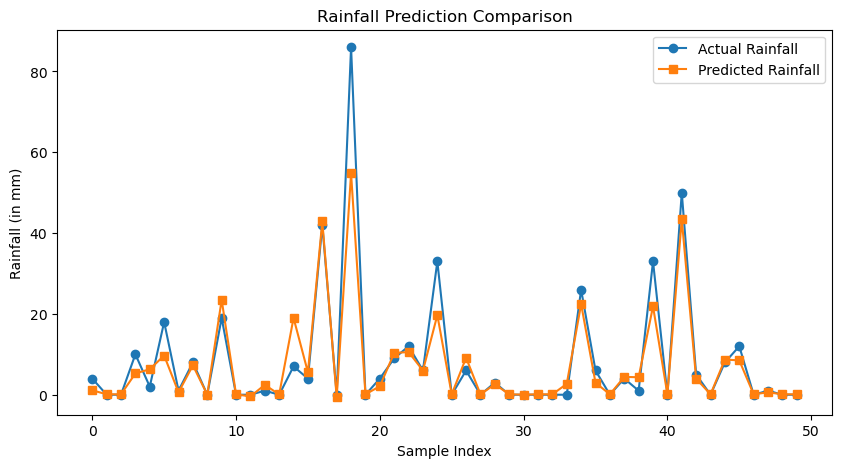

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label="Actual Rainfall", marker="o")
plt.plot(y_pred_svr[:50], label="Predicted Rainfall", marker="s")
plt.xlabel("Sample Index")
plt.ylabel("Rainfall (in mm)")
plt.title("Rainfall Prediction Comparison")
plt.legend()
plt.show()

In [5]:
# MLP Regressor

In [6]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define the model with optimized hyperparameters
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam',
                   learning_rate='adaptive', max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred_mlp)
mae = mean_absolute_error(y_test, y_pred_mlp)
mse = mean_squared_error(y_test, y_pred_mlp)

print(f'R² Score: {r2:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')

R² Score: 0.7124
MAE: 3.4171
MSE: 50.4734


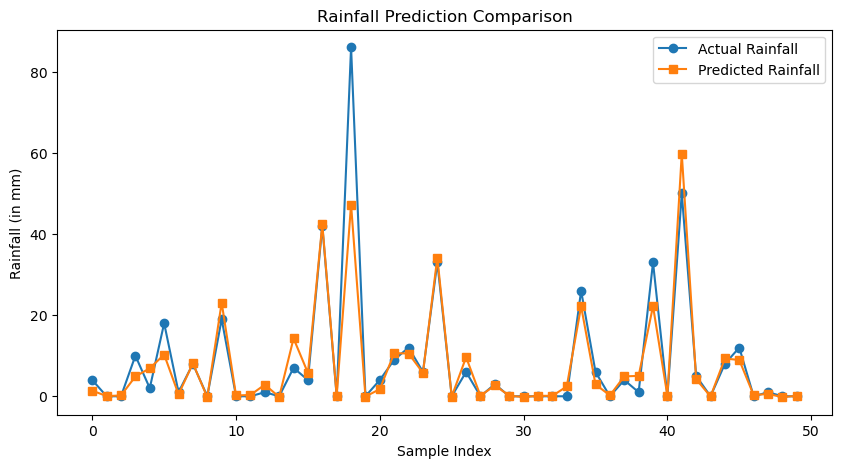

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label="Actual Rainfall", marker="o")
plt.plot(y_pred_mlp[:50], label="Predicted Rainfall", marker="s")
plt.xlabel("Sample Index")
plt.ylabel("Rainfall (in mm)")
plt.title("Rainfall Prediction Comparison")
plt.legend()
plt.show()